we'll use the askı memnu graph(created in 2nd notebook) to proceed with the topic "graph operations"

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [5]:
df = pd.read_excel("askı_memnu.xlsx")

In [6]:
df.head()

,node1,node2,relation_type
0,Firdevs,Adnan,aşık
1,Firdevs,Bihter,anne
2,Bihter,Adnan,evli
3,Nihal,Adnan,evlat
4,Matmazel,Adnan,aşık


In [12]:
G = nx.from_pandas_edgelist(df, source='node1', target='node2', edge_attr='relation_type', create_using=nx.DiGraph())


- nx.spring_layout function uses randomisation
- bard ai says that "In NetworkX 2.8.2 and earlier, spring_layout() does not accept the random_state parameter. This parameter was added in NetworkX 2.9.0 and later."
- for now we'll use np.random.seed bcz my networkx version(after upgrading) is still 2.8.4


In [21]:
pip install --upgrade networkx

     ---------------------------------------- 2.1/2.1 MB 673.4 kB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 2.8.4
    Uninstalling networkx-2.8.4:
      Successfully uninstalled networkx-2.8.4
Note: you may need to restart the kernel to use updated packages.


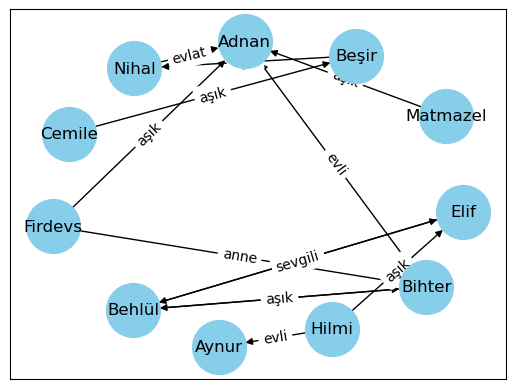

In [29]:
seed = 1234
np.random.seed(seed)
pos = nx.spring_layout(G, dim=2, k=10, iterations=200)
nx.draw_networkx(G, pos, with_labels=True, node_size=1500, node_color="skyblue")
edge_labels = nx.get_edge_attributes(G, "relation_type")
nx.draw_networkx_edge_labels(G,pos, edge_labels=edge_labels)
plt.show()

## find components of Graph

In [32]:
components = nx.weakly_connected_components(G)
for component in components:
    print(component)

{'Nihal', 'Hilmi', 'Aynur', 'Matmazel', 'Beşir', 'Bihter', 'Firdevs', 'Cemile', 'Behlül', 'Adnan', 'Elif'}


In [33]:
components = nx.strongly_connected_components(G)
for component in components:
    print(component)

{'Adnan'}
{'Elif', 'Bihter', 'Behlül'}
{'Firdevs'}
{'Nihal'}
{'Matmazel'}
{'Aynur'}
{'Hilmi'}
{'Beşir'}
{'Cemile'}


##### strong and weak components of the graph
- If there is a path from the component to other components in the graph (taking into account the directions), that component is a strong component.
- If a path can be found without considering the directions, it is the weak component.
- be careful not EDGE, we're finding PATH

## insertion and deletion of node

In [35]:
G.add_node("Bülent")

In [40]:
G.remove_node("Beşir")


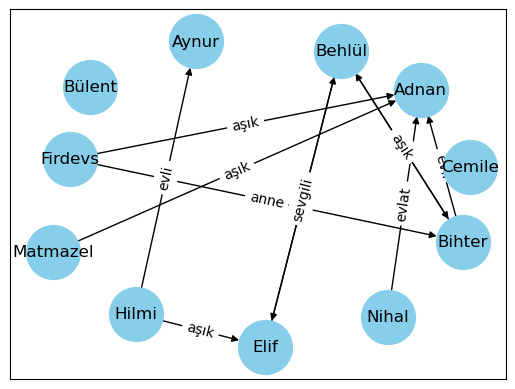

In [41]:
seed = 78
np.random.seed(seed)
pos = nx.spring_layout(G, dim=2, k=10, iterations=200)
nx.draw_networkx(G, pos, with_labels=True, node_size=1500, node_color="skyblue")
edge_labels = nx.get_edge_attributes(G, "relation_type")
nx.draw_networkx_edge_labels(G,pos, edge_labels=edge_labels)
plt.show()

## inserting and deletion of edge

In [43]:
G.add_edge("Matmazel", "Bülent", relation_type="dadı")
G.add_edge("Adnan", "Bülent", relation_type="evlat")

In [44]:
G.remove_edge("Firdevs", "Adnan")
G.add_edge("Firdevs", "Adnan", relation_type="dünür")

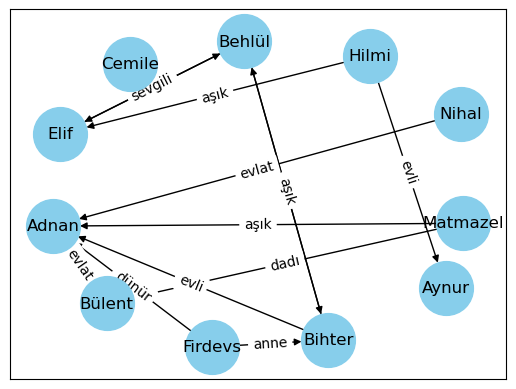

In [46]:
seed = 65
np.random.seed(seed)
pos = nx.spring_layout(G, dim=2, k=10, iterations=200)
nx.draw_networkx(G, pos, with_labels=True, node_size=1500, node_color="skyblue")
edge_labels = nx.get_edge_attributes(G, "relation_type")
nx.draw_networkx_edge_labels(G,pos, edge_labels=edge_labels)
plt.show()

## find neighbors and reach the relations 

In [52]:
neighbors_of_adnan = G.neighbors("Adnan")

In [54]:
type(neighbors_of_adnan)

dict_keyiterator

In [55]:
for neighbor in neighbors_of_adnan:
    print(neighbor, G.edges["Adnan", neighbor]['relation_type'])

Bülent evlat


neighbor? 
- Neighbors of Node1 are nodes with a directional edge from Node1 to other nodes (direction is important, source=Adnan is now).

In [57]:
neighbors_of_matmazel = G.neighbors("Matmazel")
for neighbor in neighbors_of_matmazel:
    print(neighbor, G.edges["Matmazel", neighbor]["relation_type"])

Adnan aşık
Bülent dadı


## graph is not suitable for finding shortest path, we gonna study on it later.